In [1]:
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from scipy import stats

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

## Loading Data

In [2]:
dark = pd.read_csv("tv_show_data/dark.csv")
dark["date"] = pd.to_datetime(dark["date"])
dark = dark.sort_values(by="date")
dark= dark.set_index("date")
print("Dateset Size : ",dark.shape)

dark.head()

Dateset Size :  (986, 5)


,Unnamed: 0,imdb_id,production_co,genre,occurences
date,,,,,
2017-12-01,0,tt5753856,Netflix,Crime,622
2017-12-02,1,tt5753856,Netflix,Crime,1396
2017-12-03,2,tt5753856,Netflix,Crime,2854
2017-12-04,4,tt5753856,Netflix,Crime,3822
2017-12-05,3,tt5753856,Netflix,Crime,19062


In [3]:
money_heist = pd.read_csv("tv_show_data/money_heist.csv")
money_heist["date"] = pd.to_datetime(money_heist["date"])
money_heist = money_heist.sort_values(by="date")
money_heist= money_heist.set_index("date")
print("Dateset Size : ",money_heist.shape)

money_heist.head()

Dateset Size :  (1153, 5)


,Unnamed: 0,imdb_id,production_co,genre,occurences
date,,,,,
2017-06-13,0,tt6468322,Netflix,Action,2223
2017-06-14,1,tt6468322,Netflix,Action,2614
2017-06-15,2,tt6468322,Netflix,Action,3559
2017-06-16,3,tt6468322,Netflix,Action,3701
2017-06-17,4,tt6468322,Netflix,Action,3809


In [4]:
star_trek = pd.read_csv("tv_show_data/star_trek.csv")
star_trek["date"] = pd.to_datetime(star_trek["date"])
star_trek = star_trek.sort_values(by="date")
star_trek= star_trek.set_index("date")
print("Dateset Size : ",star_trek.shape)

star_trek.head()

Dateset Size :  (1228, 5)


,Unnamed: 0,imdb_id,production_co,genre,occurences
date,,,,,
2017-04-01,0,tt0092455,Syndication,Action,439
2017-04-01,3,tt0092455,Syndication,Action,439
2017-04-02,2,tt0092455,Syndication,Action,599
2017-04-03,1,tt0092455,Syndication,Action,627
2017-04-04,4,tt0092455,Syndication,Action,554


In [5]:
the_office = pd.read_csv("tv_show_data/the_office.csv")
the_office["date"] = pd.to_datetime(the_office["date"])
the_office = the_office.sort_values(by="date")
the_office= the_office.set_index("date")
print("Dateset Size : ",the_office.shape)

the_office.head()

Dateset Size :  (1228, 5)


,Unnamed: 0,imdb_id,production_co,genre,occurences
date,,,,,
2017-04-01,0,tt0386676,NBC Universal,Comedy,4220
2017-04-01,3,tt0386676,NBC Universal,Comedy,4220
2017-04-02,2,tt0386676,NBC Universal,Comedy,4933
2017-04-03,1,tt0386676,NBC Universal,Comedy,4484
2017-04-04,4,tt0386676,NBC Universal,Comedy,3634


## Visualizing Data & Basic Stats

### 1. Dark

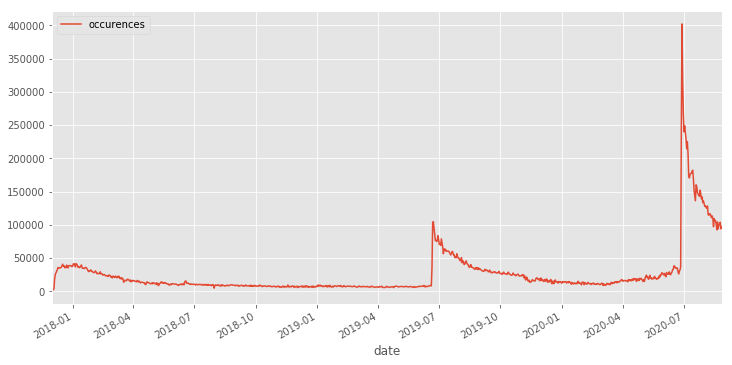

In [6]:
with plt.style.context("ggplot"):
    dark.plot(y="occurences", figsize=(12,6));

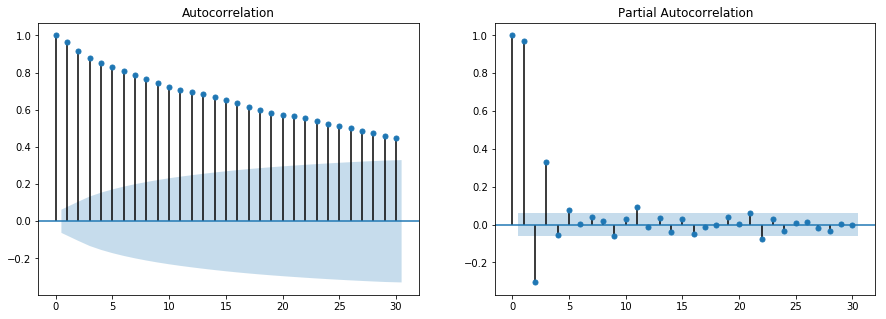

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plot_acf(dark["occurences"], ax=ax1);
ax2 = fig.add_subplot(122)
plot_pacf(dark["occurences"], ax=ax2);

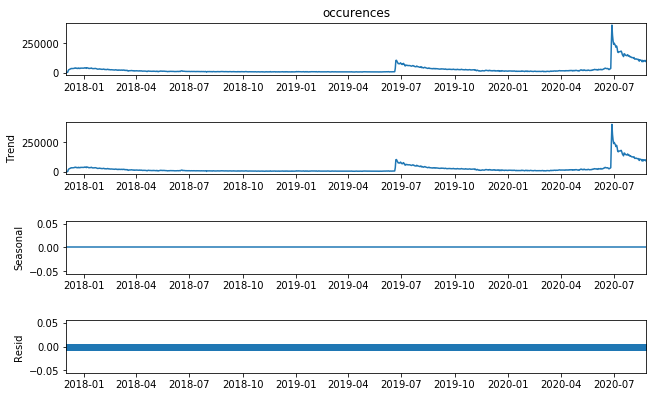

In [8]:
decompose = seasonal_decompose(dark["occurences"],  period=1)

fig = decompose.plot();
fig.set_figwidth(10);fig.set_figheight(6);

In [9]:
def test_stationarity(df):
    adf, p_value, usedlag, n_obs, critical_vals, icbest = adfuller(df)

    print("1. ADF : ",adf)
    print("2. P-Value : ", p_value)
    print("2. P-Value : %.3f"%(p_value))
    print("3. Num Of Lags : ", usedlag)
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", n_obs)
    print("5. Critical Values :")
    for key, val in critical_vals.items():
        print("\t",key, ": ", val)

In [10]:
test_stationarity(dark[["occurences"]])

1. ADF :  -2.633754609071489
2. P-Value :  0.08621959994176975
2. P-Value : 0.086
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 975
5. Critical Values :
	 1% :  -3.43707471791689
	 5% :  -2.8645089073679597
	 10% :  -2.5683508010519396


In [11]:
stat,p = stats.normaltest(dark[["occurences"]])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('CSI1 : Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('CSI1 : Data looks non-Gaussian (reject null hypothesis)')

Statistics = 870.370, p=0.000
CSI1 : Data looks non-Gaussian (reject null hypothesis)


count       986.000000
mean      26554.911765
std       38548.061207
min         622.000000
25%        8275.750000
50%       13604.000000
75%       27237.250000
max      402367.000000
Name: occurences, dtype: float64

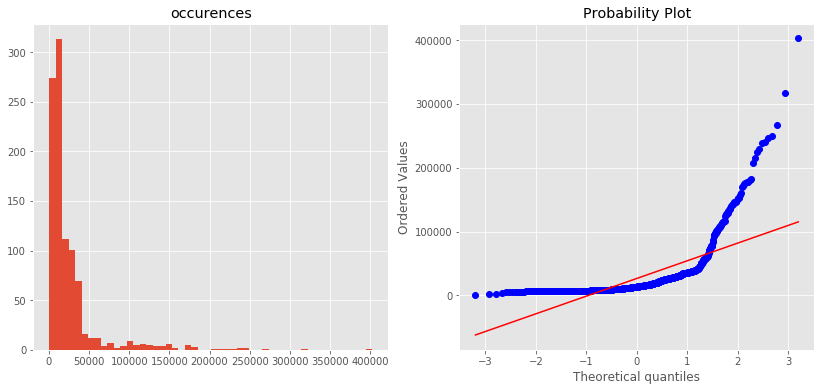

In [12]:
with plt.style.context(("ggplot")):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    dark['occurences'].hist(bins=50)
    plt.title('occurences')
    plt.subplot(1,2,2)
    stats.probplot(dark['occurences'], plot=plt);

dark.occurences.describe().T

### 2. Money Heist

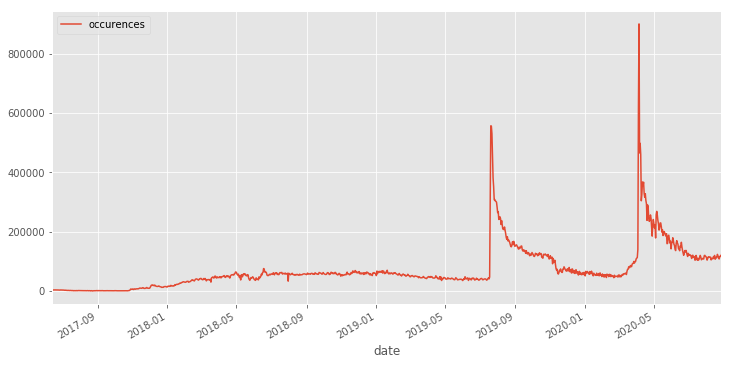

In [13]:
with plt.style.context("ggplot"):
    money_heist.plot(y="occurences", figsize=(12,6));

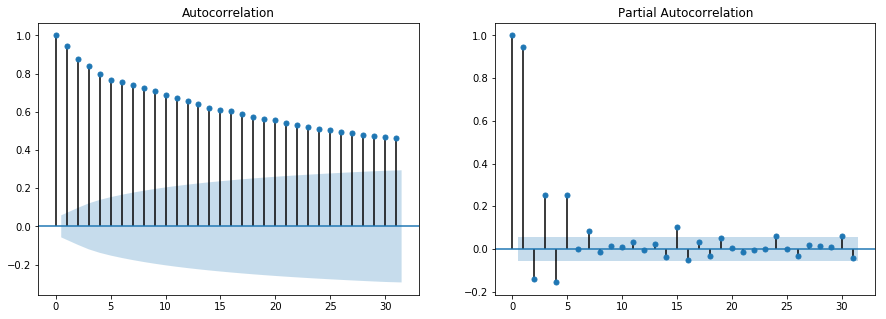

In [14]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plot_acf(money_heist["occurences"], ax=ax1);
ax2 = fig.add_subplot(122)
plot_pacf(money_heist["occurences"], ax=ax2);

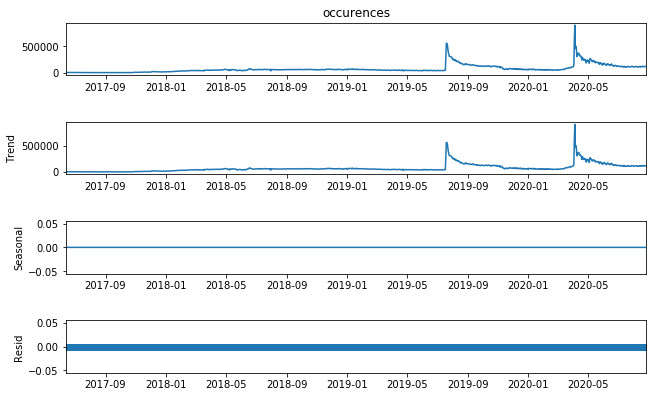

In [15]:
decompose = seasonal_decompose(money_heist["occurences"],  period=1)

fig = decompose.plot();
fig.set_figwidth(10);fig.set_figheight(6);

In [16]:
test_stationarity(money_heist[["occurences"]])

1. ADF :  -3.4442486682341267
2. P-Value :  0.009539806538783538
2. P-Value : 0.010
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1137
5. Critical Values :
	 1% :  -3.436114401808766
	 5% :  -2.8640853428381092
	 10% :  -2.568125207156112


In [17]:
stat,p = stats.normaltest(money_heist[["occurences"]])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('CSI1 : Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('CSI1 : Data looks non-Gaussian (reject null hypothesis)')

Statistics = 917.375, p=0.000
CSI1 : Data looks non-Gaussian (reject null hypothesis)


count      1153.000000
mean      72429.615785
std       76245.556098
min         234.000000
25%       38799.000000
50%       55248.000000
75%       73509.000000
max      900732.000000
Name: occurences, dtype: float64

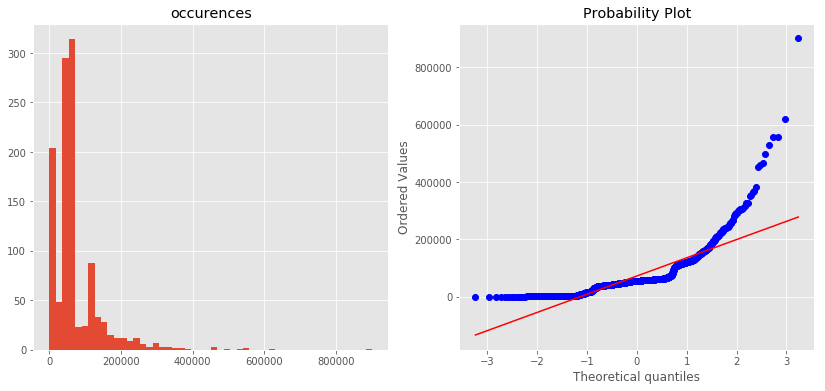

In [18]:
with plt.style.context(("ggplot")):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    money_heist['occurences'].hist(bins=50)
    plt.title('occurences')
    plt.subplot(1,2,2)
    stats.probplot(money_heist['occurences'], plot=plt);

money_heist.occurences.describe().T

### 3. Star Trek

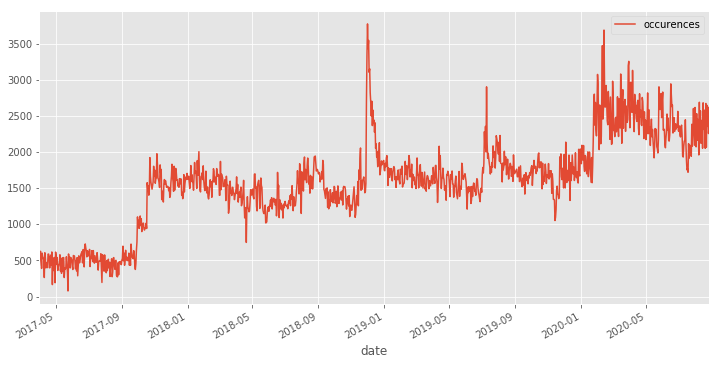

In [19]:
with plt.style.context("ggplot"):
    star_trek.plot(y="occurences", figsize=(12,6));

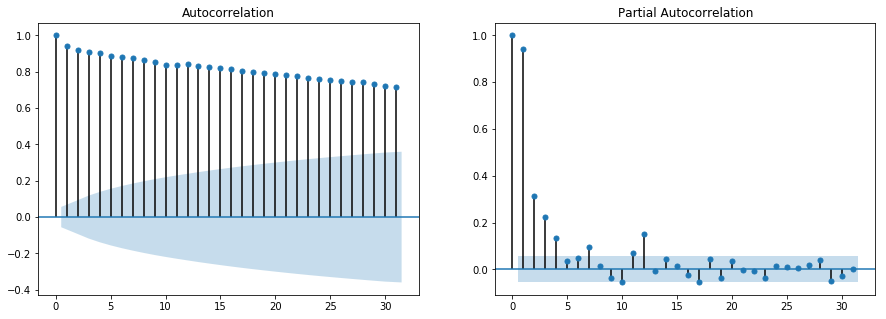

In [20]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plot_acf(star_trek["occurences"], ax=ax1);
ax2 = fig.add_subplot(122)
plot_pacf(star_trek["occurences"], ax=ax2);

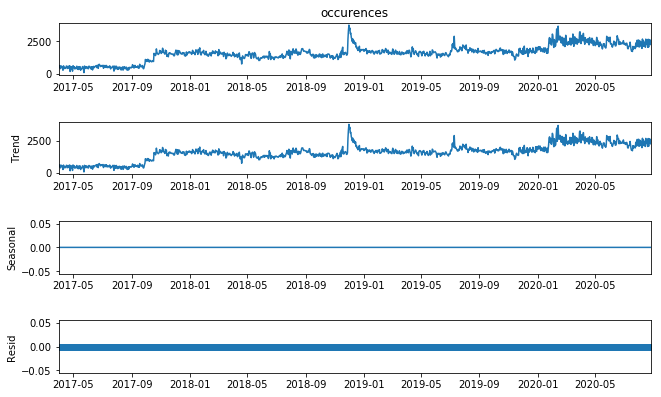

In [21]:
decompose = seasonal_decompose(star_trek["occurences"],  period=1)

fig = decompose.plot();
fig.set_figwidth(10);fig.set_figheight(6);

In [22]:
test_stationarity(star_trek[["occurences"]])

1. ADF :  -2.1249074324567925
2. P-Value :  0.23461784547505554
2. P-Value : 0.235
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1216
5. Critical Values :
	 1% :  -3.435739110194116
	 5% :  -2.863919777127088
	 10% :  -2.5680370312770515


In [23]:
stat,p = stats.normaltest(star_trek[["occurences"]])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('CSI1 : Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('CSI1 : Data looks non-Gaussian (reject null hypothesis)')

Statistics = 3.296, p=0.192
CSI1 : Data looks Gaussian (fail to reject null hypothesis)


count    1228.000000
mean     1585.905537
std       620.778207
min        78.000000
25%      1337.750000
50%      1611.000000
75%      1873.250000
max      3774.000000
Name: occurences, dtype: float64

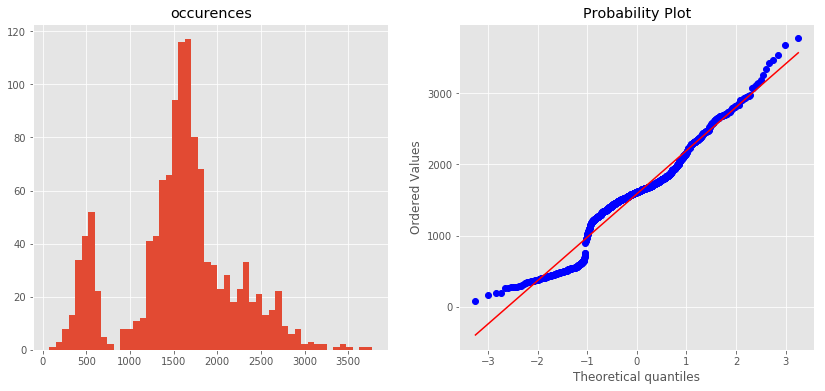

In [24]:
with plt.style.context(("ggplot")):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    star_trek['occurences'].hist(bins=50)
    plt.title('occurences')
    plt.subplot(1,2,2)
    stats.probplot(star_trek['occurences'], plot=plt);

star_trek.occurences.describe().T

### 4. The Office

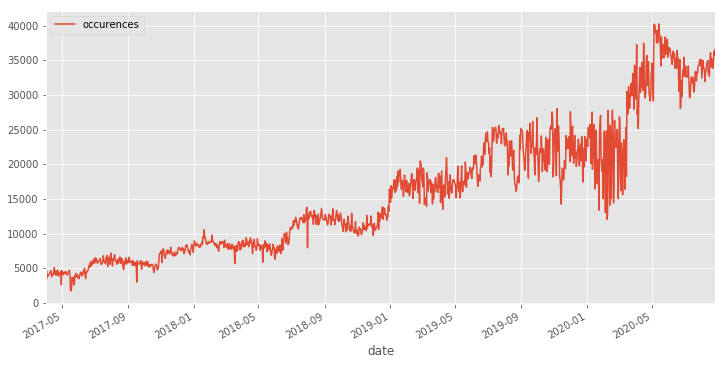

In [25]:
with plt.style.context("ggplot"):
    the_office.plot(y="occurences", figsize=(12,6));

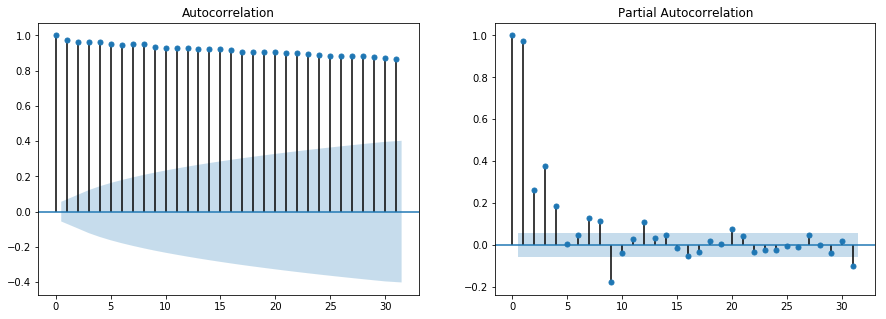

In [26]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
plot_acf(the_office["occurences"], ax=ax1);
ax2 = fig.add_subplot(122)
plot_pacf(the_office["occurences"], ax=ax2);

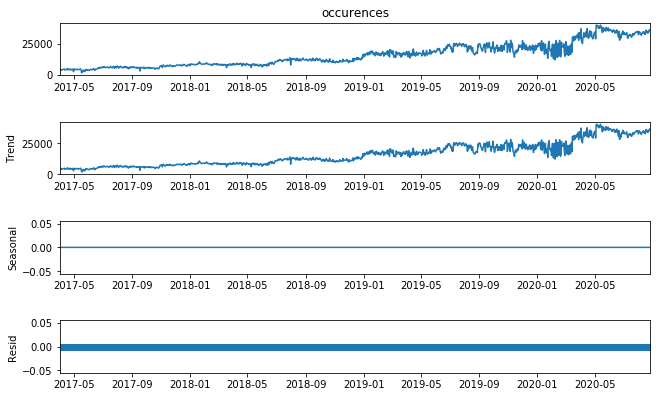

In [27]:
decompose = seasonal_decompose(the_office["occurences"],  period=1)

fig = decompose.plot();
fig.set_figwidth(10);fig.set_figheight(6);

In [28]:
test_stationarity(the_office[["occurences"]])

1. ADF :  0.15897334722028028
2. P-Value :  0.9698643492160596
2. P-Value : 0.970
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1207
5. Critical Values :
	 1% :  -3.43577938005948
	 5% :  -2.863937543790164
	 10% :  -2.568046493171221


In [29]:
stat,p = stats.normaltest(the_office[["occurences"]])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('CSI1 : Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('CSI1 : Data looks non-Gaussian (reject null hypothesis)')

Statistics = 107.480, p=0.000
CSI1 : Data looks non-Gaussian (reject null hypothesis)


count     1228.000000
mean     15788.056189
std       9421.264499
min       1712.000000
25%       7995.750000
50%      12872.500000
75%      22063.750000
max      40242.000000
Name: occurences, dtype: float64

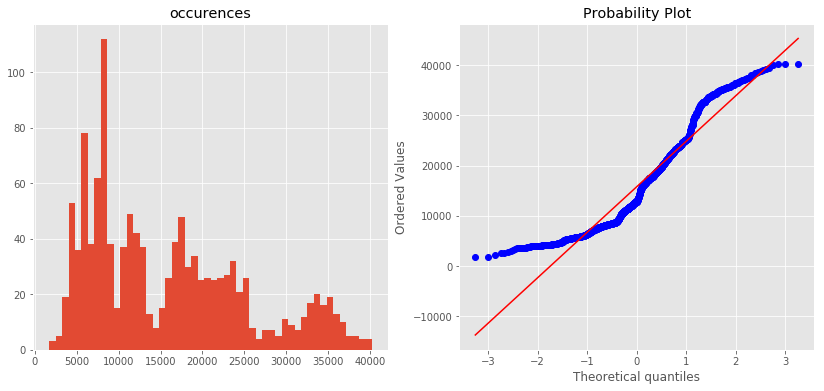

In [30]:
with plt.style.context(("ggplot")):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    the_office['occurences'].hist(bins=50)
    plt.title('occurences')
    plt.subplot(1,2,2)
    stats.probplot(the_office['occurences'], plot=plt);

the_office.occurences.describe().T

In [31]:
print("Kurtosis of normal distribution (The Office) : ", stats.kurtosis(the_office[["occurences"]]))
print("Kurtosis of normal distribution (Money Heist) : ", stats.kurtosis(money_heist[["occurences"]]))
print("Kurtosis of normal distribution (Star Trek) : ", stats.kurtosis(star_trek[["occurences"]]))
print("Kurtosis of normal distribution (Dark) : ", stats.kurtosis(dark[["occurences"]]))

Kurtosis of normal distribution (The Office) :  [-0.48295892]
Kurtosis of normal distribution (Money Heist) :  [21.07355709]
Kurtosis of normal distribution (Star Trek) :  [0.24014507]
Kurtosis of normal distribution (Dark) :  [21.70272936]


In [32]:
print("Kurtosis of normal distribution (The Office) : ", stats.skew(the_office[["occurences"]]))
print("Kurtosis of normal distribution (Money Heist) : ", stats.skew(money_heist[["occurences"]]))
print("Kurtosis of normal distribution (Star Trek) : ", stats.skew(star_trek[["occurences"]]))
print("Kurtosis of normal distribution (Dark) : ", stats.skew(dark[["occurences"]]))

Kurtosis of normal distribution (The Office) :  [0.71678784]
Kurtosis of normal distribution (Money Heist) :  [3.50016638]
Kurtosis of normal distribution (Star Trek) :  [-0.0517547]
Kurtosis of normal distribution (Dark) :  [4.09730483]


# ARIMA

## The Office

In [33]:
future_pred_cnt = 5

X_train, X_test = the_office[["occurences"]][:-future_pred_cnt], the_office[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1223, 1), (5, 1))

In [34]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -10.589130621260425
2. P-Value :  6.597451441515709e-19
2. P-Value : 0.000
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1202
5. Critical Values :
	 1% :  -3.43580201334162
	 5% :  -2.8639475292642795
	 10% :  -2.5680518110968684


In [35]:
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

def try_arima(X_train_diff, X_test, ar_range, i_range, ma_range, trends):
    ar, i, ma, trend, least_mse = None, None, None, None, 1e9

    for j in ar_range:
        for k in i_range:
            for l in ma_range:
                for t in trends:
                    try:
                        model = ARIMA(X_train_diff, order=(j, k, l), trend=t)
                        model_fit = model.fit()
                        preds = model_fit.forecast(steps=future_pred_cnt)
                        preds = (pd.DataFrame(preds, columns=X_test.columns + '_pred'))
                        actual_preds = invert_transformation(X_train, preds)
                        mse = mean_squared_error(actual_preds.values, X_test.values)
                        if mse < least_mse:
                            least_mse = mse
                            ar, i, ma, trend = j, k, l, t
                    except:
                        #print("Error: Param Settings : %d, %d, %d, %s"%(j, k, l, t))
                        continue
    return least_mse, ar, i, ma, trend

In [36]:
%%time

least_mse, ar, i, ma, trend = try_arima(X_train_diff, X_test, range(1,7), range(2), range(7), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : (AR : %d, I : %d, MA : %d, Trend : %s)"%(least_mse, ar, i, ma, trend))

Least MSE 739097.9 with Param Settings : (AR : 3, I : 1, MA : 0, Trend : ct)
CPU times: user 15min 12s, sys: 7min 20s, total: 22min 32s
Wall time: 5min 49s


In [37]:
def make_predictions(X_train_diff, ar, i, ma, trend):
    model = ARIMA(X_train_diff, order=(ar, i, ma), trend=trend)
    model_fit = model.fit()
    
    pred = model_fit.forecast(steps=future_pred_cnt)
    pred = (pd.DataFrame(pred, columns=X_test.columns + '_pred'))

    actual_pred = invert_transformation(X_train, pred)
    actual_pred.index = X_test.index.values
    actual_pred.index.name = "date"

    return actual_pred

In [38]:
def combine_results(actual_pred, X_test):
    combine = pd.concat([actual_pred['occurences_pred'], X_test['occurences']], axis=1)
    combine['accuracy'] = round(combine.apply(lambda row: row.occurences_pred /row.occurences *100, axis = 1),2)
    combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
    combine = combine.round(decimals=2).reset_index()
    #combine = combine.sort_values(by='date', ascending=False)
    return combine

In [39]:
actual_pred = make_predictions(X_train_diff, ar, i, ma, trend)

actual_pred

,occurences_pred
date,
2020-08-22,34410.822193
2020-08-23,35428.531744
2020-08-24,36708.199574
2020-08-25,37059.850546
2020-08-26,37893.727307


In [40]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,34410.82,34042,101.08%
1,2020-08-23,35428.53,35654,99.37%
2,2020-08-24,36708.20,36339,101.02%
3,2020-08-25,37059.85,35706,103.79%
4,2020-08-26,37893.73,36653,103.39%


In [41]:
#with plt.style.context("ggplot"):
#    combined_results.plot(y=["occurences", "occurences_pred"])

## Start Trek

In [42]:
future_pred_cnt = 5

X_train, X_test = star_trek[["occurences"]][:-future_pred_cnt], star_trek[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1223, 1), (5, 1))

In [43]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -14.891625834885964
2. P-Value :  1.5541921104047747e-27
2. P-Value : 0.000
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1211
5. Critical Values :
	 1% :  -3.435761408287299
	 5% :  -2.863929614852828
	 10% :  -2.568042270495956


In [44]:
%%time

least_mse, ar, i, ma, trend = try_arima(X_train_diff, X_test, range(1,7), range(2), range(7), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : (AR : %d, I : %d, MA : %d, Trend : %s)"%(least_mse, ar, i, ma, trend))

Least MSE 32300.7 with Param Settings : (AR : 1, I : 1, MA : 0, Trend : ct)
CPU times: user 16min 13s, sys: 7min 39s, total: 23min 52s
Wall time: 6min 6s


In [45]:
actual_pred = make_predictions(X_train_diff, ar, i, ma, trend)

actual_pred

,occurences_pred
date,
2020-08-22,2380.486035
2020-08-23,2276.672205
2020-08-24,2415.922047
2020-08-25,2413.176361
2020-08-26,2492.963880


In [46]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,2380.49,2648,89.90%
1,2020-08-23,2276.67,2356,96.63%
2,2020-08-24,2415.92,2623,92.11%
3,2020-08-25,2413.18,2257,106.92%
4,2020-08-26,2492.96,2365,105.41%


## Money Heist

In [47]:
future_pred_cnt = 5

X_train, X_test = money_heist[["occurences"]][:-future_pred_cnt], money_heist[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1148, 1), (5, 1))

In [48]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -9.999727891007765
2. P-Value :  1.8982961610986916e-17
2. P-Value : 0.000
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1129
5. Critical Values :
	 1% :  -3.436155341313321
	 5% :  -2.8641034026875123
	 10% :  -2.568134825546958


In [49]:
%%time

least_mse, ar, i, ma, trend = try_arima(X_train_diff, X_test, range(1,7), range(2), range(7), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : (AR : %d, I : %d, MA : %d, Trend : %s)"%(least_mse, ar, i, ma, trend))

Least MSE 20913882.5 with Param Settings : (AR : 1, I : 0, MA : 0, Trend : ct)
CPU times: user 11min 42s, sys: 8min 15s, total: 19min 58s
Wall time: 5min 10s


In [50]:
actual_pred = make_predictions(X_train_diff, ar, i, ma, trend)

actual_pred

,occurences_pred
date,
2020-08-22,116439.513028
2020-08-23,116601.002349
2020-08-24,116767.450069
2020-08-25,116934.326700
2020-08-26,117101.143968


In [51]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,116439.51,108160,107.65%
1,2020-08-23,116601.00,114744,101.62%
2,2020-08-24,116767.45,117925,99.02%
3,2020-08-25,116934.33,117788,99.28%
4,2020-08-26,117101.14,122624,95.50%


## Dark

In [52]:
future_pred_cnt = 5

X_train, X_test = dark[["occurences"]][:-future_pred_cnt], dark[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((981, 1), (5, 1))

In [53]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -12.299615264902352
2. P-Value :  7.50187346600036e-23
2. P-Value : 0.000
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 970
5. Critical Values :
	 1% :  -3.437109473790722
	 5% :  -2.8645242345396436
	 10% :  -2.568358964820916


In [54]:
%%time

least_mse, ar, i, ma, trend = try_arima(X_train_diff, X_test, range(1,7), range(2), range(7), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : (AR : %d, I : %d, MA : %d, Trend : %s)"%(least_mse, ar, i, ma, trend))

Least MSE 55392197.0 with Param Settings : (AR : 1, I : 1, MA : 0, Trend : ct)
CPU times: user 12min 50s, sys: 6min 53s, total: 19min 43s
Wall time: 5min 9s


In [55]:
actual_pred = make_predictions(X_train_diff, ar, i, ma, trend)

actual_pred

,occurences_pred
date,
2020-08-22,97227.969464
2020-08-23,100102.264497
2020-08-24,102991.942334
2020-08-25,105867.428727
2020-08-26,108731.869202


In [56]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,97227.97,100155,97.08%
1,2020-08-23,100102.26,100853,99.26%
2,2020-08-24,102991.94,104010,99.02%
3,2020-08-25,105867.43,94127,112.47%
4,2020-08-26,108731.87,97376,111.66%


# SARIMA

## The Office

In [57]:
future_pred_cnt = 5

X_train, X_test = the_office[["occurences"]][:-future_pred_cnt], the_office[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1223, 1), (5, 1))

In [58]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -10.589130621260425
2. P-Value :  6.597451441515709e-19
2. P-Value : 0.000
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1202
5. Critical Values :
	 1% :  -3.43580201334162
	 5% :  -2.8639475292642795
	 10% :  -2.5680518110968684


In [59]:
def try_sarima(X_train_diff, X_test, ar_range, i_range, ma_range, s_range, trends):
    p_m, d_m, q_m, P_m,D_m,Q_m, seasonal, trend, least_mse = None, None, None, None, None, None, None, None, 1e9

    for p in ar_range:
        for d in i_range:
            for q in ma_range:
                for P in ar_range:
                    for D in i_range:
                        for Q in ma_range:
                            for s in s_range:
                                for t in trends:
                                    try:
                                        model = SARIMAX(X_train_diff, order=(p,d,q), seasonal_order=(P, D, Q, s), trend=t)
                                        model_fit = model.fit()
                                        preds = model_fit.forecast(steps=future_pred_cnt)
                                        preds = (pd.DataFrame(preds, columns=X_test.columns + '_pred'))
                                        actual_preds = invert_transformation(X_train, preds)
                                        mse = mean_squared_error(actual_preds.values, X_test.values)
                                        if mse < least_mse:
                                            least_mse = mse
                                            p_m, d_m, q_m, P_m, D_m, Q_m, seasonal, trend = p, d, q, P, D, Q, s, t
                                    except Exception as e:
                                        #print(e)
                                        #print("Error: Param Settings : (%d, %d, %d), (%d, %d, %d, %d), %s"%(p, d, q, P, D, Q, s, t))
                                        continue
    return least_mse, p_m, d_m, q_m, P_m, D_m, Q_m, seasonal, trend

In [60]:
%%time

least_mse, p, d, q, P, D, Q, s, trend = try_sarima(X_train_diff, X_test, range(1,3), range(2), range(3), range(2, 4), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : ((p : %d, d : %d, q : %d), (P : %d, D : %d, Q : %d, Seasonal : %d), Trend : %s)"%(least_mse, p, d, q, P, D, Q, s, trend))

Least MSE 283512.0 with Param Settings : ((p : 2, d : 1, q : 2), (P : 2, D : 1, Q : 2, Seasonal : 3), Trend : ct)
CPU times: user 42min 37s, sys: 20min 31s, total: 1h 3min 8s
Wall time: 16min 21s


In [61]:
def make_predictions(X_train_diff, p, d, q, P, D, Q, s, trend):
    model = ARIMA(X_train_diff, order=(p, d, q), seasonal_order=(P, D, Q, s), trend=trend)
    model_fit = model.fit()
    pred = model_fit.forecast(steps=future_pred_cnt)
    pred = (pd.DataFrame(pred, columns=X_test.columns + '_pred'))

    actual_pred = invert_transformation(X_train, pred)
    actual_pred.index = X_test.index.values
    actual_pred.index.name = "date"

    return actual_pred

In [62]:
actual_pred = make_predictions(X_train_diff, p, d, q, P, D, Q, s, trend)

actual_pred

,occurences_pred
date,
2020-08-22,34108.453670
2020-08-23,34772.177158
2020-08-24,34697.971407
2020-08-25,34580.158744
2020-08-26,35025.778602


In [63]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,34108.45,34042,100.20%
1,2020-08-23,34772.18,35654,97.53%
2,2020-08-24,34697.97,36339,95.48%
3,2020-08-25,34580.16,35706,96.85%
4,2020-08-26,35025.78,36653,95.56%


## Start Trek

In [64]:
future_pred_cnt = 5

X_train, X_test = star_trek[["occurences"]][:-future_pred_cnt], star_trek[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1223, 1), (5, 1))

In [65]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -14.891625834885964
2. P-Value :  1.5541921104047747e-27
2. P-Value : 0.000
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1211
5. Critical Values :
	 1% :  -3.435761408287299
	 5% :  -2.863929614852828
	 10% :  -2.568042270495956


In [66]:
%%time

least_mse, p, d, q, P, D, Q, s, trend = try_sarima(X_train_diff, X_test, range(1,3), range(2), range(3), range(2, 4), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : ((p : %d, d : %d, q : %d), (P : %d, D : %d, Q : %d, Seasonal : %d), Trend : %s)"%(least_mse, p, d, q, P, D, Q, s, trend))

Least MSE 45710.8 with Param Settings : ((p : 1, d : 0, q : 1), (P : 1, D : 1, Q : 0, Seasonal : 2), Trend : n)
CPU times: user 43min 22s, sys: 21min 29s, total: 1h 4min 51s
Wall time: 16min 26s


In [67]:
actual_pred = make_predictions(X_train_diff, p, d, q, P, D, Q, s, trend)

actual_pred

,occurences_pred
date,
2020-08-22,2386.930331
2020-08-23,2038.858086
2020-08-24,2524.132668
2020-08-25,2054.550251
2020-08-26,2460.167950


In [68]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,2386.93,2648,90.14%
1,2020-08-23,2038.86,2356,86.54%
2,2020-08-24,2524.13,2623,96.23%
3,2020-08-25,2054.55,2257,91.03%
4,2020-08-26,2460.17,2365,104.02%


## Money Heist

In [69]:
future_pred_cnt = 5

X_train, X_test = money_heist[["occurences"]][:-future_pred_cnt], money_heist[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((1148, 1), (5, 1))

In [70]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -9.999727891007765
2. P-Value :  1.8982961610986916e-17
2. P-Value : 0.000
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1129
5. Critical Values :
	 1% :  -3.436155341313321
	 5% :  -2.8641034026875123
	 10% :  -2.568134825546958


In [71]:
%%time

least_mse, p, d, q, P, D, Q, s, trend = try_sarima(X_train_diff, X_test, range(1,3), range(2), range(3), range(2, 4), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : ((p : %d, d : %d, q : %d), (P : %d, D : %d, Q : %d, Seasonal : %d), Trend : %s)"%(least_mse, p, d, q, P, D, Q, s, trend))

Least MSE 19603023.5 with Param Settings : ((p : 1, d : 1, q : 0), (P : 1, D : 0, Q : 2, Seasonal : 2), Trend : n)
CPU times: user 25min 22s, sys: 18min 45s, total: 44min 8s
Wall time: 11min 11s


In [72]:
actual_pred = make_predictions(X_train_diff, p, d, q, P, D, Q, s, trend)

actual_pred

,occurences_pred
date,
2020-08-22,115930.750091
2020-08-23,116894.594676
2020-08-24,116534.818744
2020-08-25,117394.735570
2020-08-26,117063.582541


In [73]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,115930.75,108160,107.18%
1,2020-08-23,116894.59,114744,101.87%
2,2020-08-24,116534.82,117925,98.82%
3,2020-08-25,117394.74,117788,99.67%
4,2020-08-26,117063.58,122624,95.47%


## Dark

In [74]:
future_pred_cnt = 5

X_train, X_test = dark[["occurences"]][:-future_pred_cnt], dark[["occurences"]][-future_pred_cnt:] 

X_train.shape, X_test.shape

((981, 1), (5, 1))

In [75]:
X_train_diff = X_train.diff().dropna()

test_stationarity(X_train_diff)

1. ADF :  -12.299615264902352
2. P-Value :  7.50187346600036e-23
2. P-Value : 0.000
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 970
5. Critical Values :
	 1% :  -3.437109473790722
	 5% :  -2.8645242345396436
	 10% :  -2.568358964820916


In [76]:
%%time

least_mse, p, d, q, P, D, Q, s, trend = try_sarima(X_train_diff, X_test, range(1,3), range(2), range(3), range(2, 4), ["n", "c", "t", "ct"])

print("Least MSE %.1f with Param Settings : ((p : %d, d : %d, q : %d), (P : %d, D : %d, Q : %d, Seasonal : %d), Trend : %s)"%(least_mse, p, d, q, P, D, Q, s, trend))

Least MSE 13522392.3 with Param Settings : ((p : 1, d : 1, q : 2), (P : 1, D : 1, Q : 1, Seasonal : 3), Trend : n)
CPU times: user 28min 17s, sys: 14min 41s, total: 42min 59s
Wall time: 10min 54s


In [77]:
actual_pred = make_predictions(X_train_diff, p, d, q, P, D, Q, s, trend)

actual_pred

,occurences_pred
date,
2020-08-22,100796.091402
2020-08-23,94268.640900
2020-08-24,101159.959433
2020-08-25,95809.548582
2020-08-26,100966.748862


In [78]:
combined_results = combine_results(actual_pred, X_test)

combined_results

,date,occurences_pred,occurences,accuracy
0,2020-08-22,100796.09,100155,100.64%
1,2020-08-23,94268.64,100853,93.47%
2,2020-08-24,101159.96,104010,97.26%
3,2020-08-25,95809.55,94127,101.79%
4,2020-08-26,100966.75,97376,103.69%
